In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import os

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing

In [7]:
def convert_to_vect(Q,R,S,T):
    resp=np.empty((0,4))
    end:Boolean= False
    idx_q=0    
    idx_r=0
    idx_s=0
    idx_t=0

    
    while not end:
        try:
            q=Q[idx_q]
            r=R[idx_r]
            s=S[idx_s]
            t=T[idx_t]
        except IndexError:
                end=True
                pass    
       
        arr=np.array([q,r,s,t],dtype=int)
        if not (q <= r and  r <=s and s <=t) :#and q < x_complex and t > x_complex :
            arr=np.array([-1,-1,-1,-1],dtype=int)
            print("no")
            
        else:
            resp=np.vstack((resp,arr))           
            
        if idx_q+1<len(Q):
            idx_q=idx_q+1
        else:
            end=True
        if   idx_r+1<len(R):        
            idx_r=idx_r+1
        else:
            end=True    
        if   idx_s+1<len(S):        
            idx_s=idx_s+1
        else:
            end= True
        if   idx_t+1<len(S):        
            idx_t=idx_t+1
        else:
            end= True    
    return resp

In [8]:
files= os.listdir('./signals/died')

In [9]:
files_not_died= os.listdir('./signals/not_died')

In [10]:
files_dist=list(filter( lambda x: '_dist_vector' in x, files))

In [11]:
files_dist_2=list(filter( lambda x: '_dist_vector' in x, files_not_died))

In [12]:
def to_df_with_col(path):
    arr=np.load(path)
    df=pd.DataFrame(arr, columns=['RR','QR','RS','ST','T'])
    df['died']="/died/" in path
    df['filename']=path
    return df

In [13]:
frames= [to_df_with_col('./signals/died/'+f) for f in files_dist]
frames2= [to_df_with_col('./signals/not_died/'+f) for f in files_dist_2]

In [14]:
result = pd.concat(frames+frames2)

In [15]:
result.head()

,RR,QR,RS,ST,T,died,filename
0,108.0,7.0,11.0,9.0,0.187698,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
1,107.0,7.0,11.0,10.0,0.201723,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
2,108.0,7.0,11.0,9.0,0.179334,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
3,107.0,7.0,11.0,9.0,0.198247,True,./signals/died/p000491-2170-04-03-14-08_dist_v...
4,106.0,6.0,8.0,11.0,0.138021,True,./signals/died/p000491-2170-04-03-14-08_dist_v...


In [16]:
result.shape

(14370040, 7)

In [17]:
no_dups=result.drop_duplicates(subset=['RR','QR', 'RS','ST','T'], keep='last', inplace=False)

In [18]:
no_dups.shape

(14345971, 7)

In [19]:
no_dups.groupby('died').count()['RR']

died
False    10318735
True      4027236
Name: RR, dtype: int64

### Hay algunos RR que son negativos, revisamos en dónde ocurren al parecer están al final de la señal 

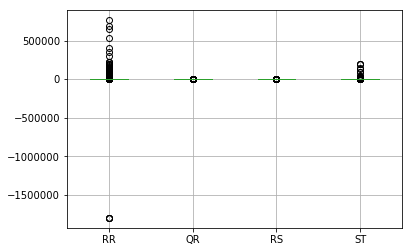

In [20]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

In [21]:
no_dups[no_dups.RR<0]

,RR,QR,RS,ST,T,died,filename
24069,-1799817.0,0.0,0.0,0.0,0.004832,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
21190,-1799790.0,0.0,0.0,0.0,-0.000402,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
19111,-1799789.0,0.0,0.0,0.0,0.001472,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19889,-1799721.0,0.0,0.0,0.0,-0.001497,False,./signals/not_died/p028869-2148-08-31-11-27_di...


In [22]:
no_dups[no_dups.RR<0].filename.values

array(['./signals/died/p004331-2142-11-02-12-06_dist_vector.npz.npy',
       './signals/died/p026575-2161-09-02-13-19_dist_vector.npz.npy',
       './signals/not_died/p013212-2192-11-06-17-30_dist_vector.npz.npy',
       './signals/not_died/p028869-2148-08-31-11-27_dist_vector.npz.npy'],
      dtype=object)

In [23]:
no_dups[no_dups.filename=='./signals/died/p004331-2142-11-02-12-06_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
24060,76.0,4.0,6.0,12.0,-0.043643,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24061,47.0,10.0,4.0,6.0,0.106595,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24062,43.0,5.0,5.0,28.0,0.028010,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24063,84.0,5.0,5.0,13.0,-0.029717,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24064,76.0,4.0,6.0,32.0,0.029588,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24065,77.0,4.0,6.0,30.0,0.032873,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24066,78.0,5.0,5.0,31.0,0.032537,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24067,77.0,4.0,6.0,30.0,0.035362,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24068,78.0,5.0,5.0,31.0,0.035428,True,./signals/died/p004331-2142-11-02-12-06_dist_v...
24069,-1799817.0,0.0,0.0,0.0,0.004832,True,./signals/died/p004331-2142-11-02-12-06_dist_v...


In [24]:
no_dups[no_dups.filename=='./signals/died/p026575-2161-09-02-13-19_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
21181,90.0,5.0,7.0,11.0,-0.055915,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21182,82.0,5.0,6.0,12.0,-0.063674,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21183,86.0,6.0,6.0,11.0,-0.069362,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21184,90.0,5.0,6.0,12.0,-0.058021,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21185,88.0,5.0,6.0,11.0,-0.074896,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21186,81.0,5.0,7.0,11.0,-0.067108,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21187,94.0,5.0,6.0,12.0,-0.066477,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21188,88.0,5.0,6.0,12.0,-0.053826,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21189,87.0,5.0,6.0,11.0,-0.059602,True,./signals/died/p026575-2161-09-02-13-19_dist_v...
21190,-1799790.0,0.0,0.0,0.0,-0.000402,True,./signals/died/p026575-2161-09-02-13-19_dist_v...


In [25]:
no_dups[no_dups.filename=='./signals/not_died/p013212-2192-11-06-17-30_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
19102,93.0,5.0,6.0,12.0,-0.328856,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19103,96.0,6.0,6.0,12.0,-0.290339,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19104,98.0,5.0,6.0,12.0,-0.293293,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19105,97.0,6.0,6.0,11.0,-0.368066,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19106,95.0,6.0,6.0,12.0,-0.364860,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19107,99.0,6.0,6.0,12.0,-0.337878,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19108,99.0,6.0,6.0,11.0,-0.312012,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19109,95.0,6.0,6.0,12.0,-0.296635,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19110,97.0,5.0,6.0,12.0,-0.267032,False,./signals/not_died/p013212-2192-11-06-17-30_di...
19111,-1799789.0,0.0,0.0,0.0,0.001472,False,./signals/not_died/p013212-2192-11-06-17-30_di...


In [26]:
no_dups[no_dups.filename=='./signals/not_died/p028869-2148-08-31-11-27_dist_vector.npz.npy'].tail(10)

,RR,QR,RS,ST,T,died,filename
19880,55.0,5.0,5.0,33.0,0.068842,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19881,77.0,5.0,5.0,35.0,0.089751,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19882,127.0,5.0,6.0,13.0,-0.093055,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19883,124.0,5.0,5.0,38.0,0.068484,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19884,74.0,5.0,5.0,34.0,0.093025,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19885,106.0,4.0,5.0,37.0,0.102207,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19886,88.0,5.0,5.0,35.0,0.091002,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19887,83.0,4.0,6.0,35.0,0.098081,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19888,67.0,5.0,13.0,22.0,0.079941,False,./signals/not_died/p028869-2148-08-31-11-27_di...
19889,-1799721.0,0.0,0.0,0.0,-0.001497,False,./signals/not_died/p028869-2148-08-31-11-27_di...


In [27]:
# Quitar RR negativos
no_dups=no_dups[no_dups.RR>0]

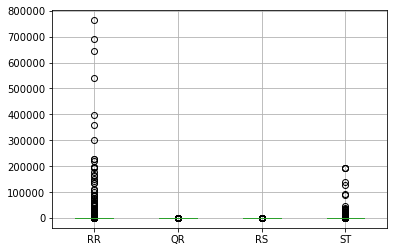

In [28]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

### Hay RR que son muy altos, puede deberse a que el segmento de señal analizado no detecta latidos y salta, por lo tanto se deben ignorar para el análisis, suponiendo que el mínimo HR es 40 bpm, los pícos R deberían estar como máximo separados por 1.5 segundos  60s / (40 b/min), por lo tanto quitamos para el análisis de cluster los elementos que tengan más de 1.5* fs(125)  de distancia entre picos (189)

In [29]:
no_dups=no_dups[no_dups.RR<189]

In [30]:
len(no_dups)

14315714

In [31]:
no_dups.groupby('died').count()['RR']

died
False    10299006
True      4016708
Name: RR, dtype: int64

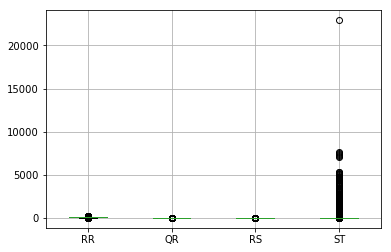

In [32]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

### Persisten problemas con la calidad de los ST, esto se puede deber a que el pico T no esta siendo debidamente identificado dentro del complejo y esta siendo detectado en picos de más adelante, sucede en aprox 700 latidos. Se descartan estos latidos para continuar el análisis.

In [33]:
no_dups.ST.describe()

count    1.431571e+07
mean     1.669576e+01
std      1.407979e+01
min      4.000000e+00
25%      1.200000e+01
50%      1.300000e+01
75%      2.100000e+01
max      2.291700e+04
Name: ST, dtype: float64

In [34]:
np.sum(no_dups.ST>189)

665

In [35]:
no_dups=no_dups[no_dups.ST<189]

In [36]:
len(no_dups)

14315045

In [37]:
no_dups.groupby('died').count()['ST']

died
False    10298447
True      4016598
Name: ST, dtype: int64

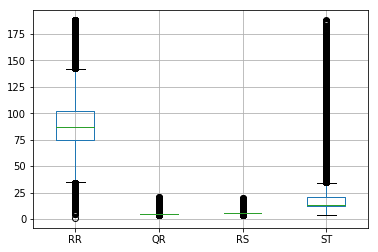

In [38]:
no_dups[['RR','QR', 'RS','ST']].boxplot()

## Comparamos individualmente las variables independientes frente a la variable objetivo

In [39]:
from scipy.stats import ttest_ind

## RR

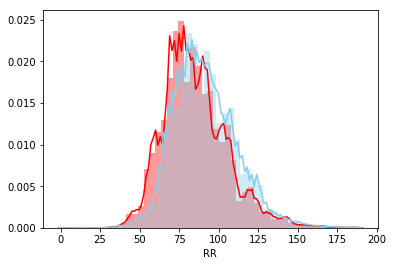

In [40]:
sns.distplot(no_dups[no_dups['died']==True].RR, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].RR, color='skyblue', label='not died')

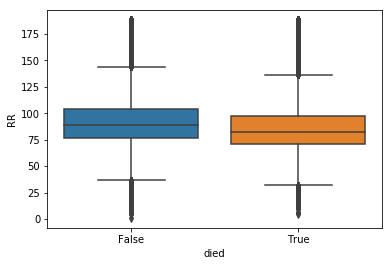

In [41]:
sns.boxplot(data=no_dups,y='RR', x='died')

In [42]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].RR,no_dups[no_dups['died']==False].RR, equal_var=False)

Ttest_indResult(statistic=-520.6094340190182, pvalue=0.0)

## QR

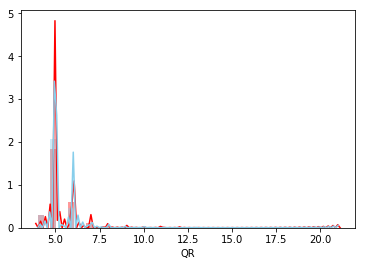

In [43]:
sns.distplot(no_dups[no_dups['died']==True].QR, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].QR, color='skyblue', label='not died')

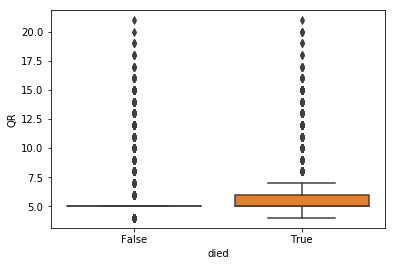

In [44]:
sns.boxplot(data=no_dups,y='QR', x='died')

In [45]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].QR,no_dups[no_dups['died']==False].QR, equal_var=False)

Ttest_indResult(statistic=247.76958054555837, pvalue=0.0)

## RS

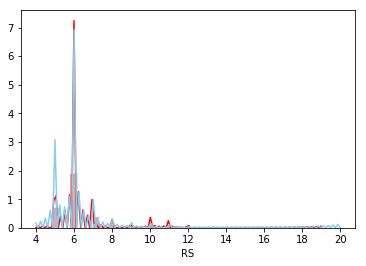

In [46]:
sns.distplot(no_dups[no_dups['died']==True].RS, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].RS, color='skyblue', label='not died')

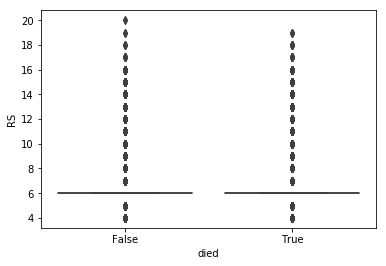

In [47]:
sns.boxplot(data=no_dups,y='RS', x='died')

In [48]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].RS,no_dups[no_dups['died']==False].RS, equal_var=False)

Ttest_indResult(statistic=327.33035729042683, pvalue=0.0)

## ST

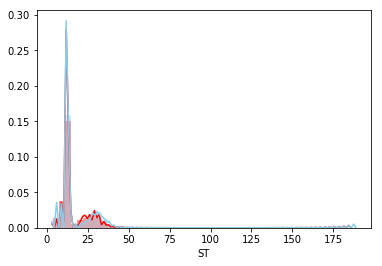

In [49]:
sns.distplot(no_dups[no_dups['died']==True].ST, color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False].ST, color='skyblue', label='not died')

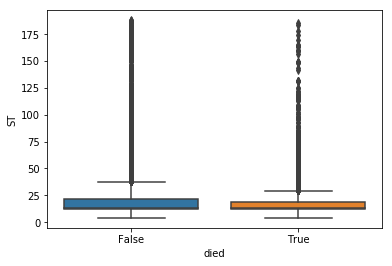

In [50]:
sns.boxplot(data=no_dups,y='ST', x='died')

In [51]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True].ST,no_dups[no_dups['died']==False].ST, equal_var=False)

Ttest_indResult(statistic=-190.7656551922509, pvalue=0.0)

## T

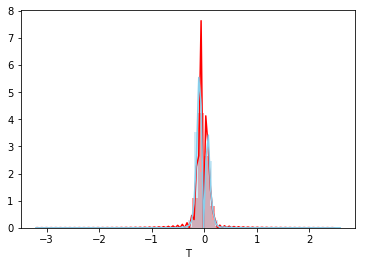

In [52]:
sns.distplot(no_dups[no_dups['died']==True]['T'], color='red', label='died')
sns.distplot(no_dups[no_dups['died']==False]['T'], color='skyblue', label='not died')

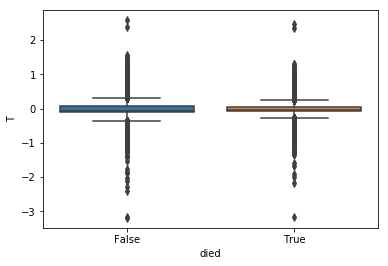

In [53]:
sns.boxplot(data=no_dups,y='T', x='died')

In [54]:
#Null is equal averages, discarded
ttest_ind(no_dups[no_dups['died']==True]['T'],no_dups[no_dups['died']==False]['T'], equal_var=False)

Ttest_indResult(statistic=221.96682083757784, pvalue=0.0)

In [55]:
no_dups.shape

(14315045, 7)

## Aplicamos estadarización de features

In [56]:
scaler= preprocessing.StandardScaler().fit(no_dups[['RR','QR', 'RS','ST','T']])

In [57]:
X=scaler.transform(no_dups[['RR','QR', 'RS','ST','T']])

In [58]:
X

array([[ 0.91331352,  2.09362363,  3.93253542, -0.87487704,  2.04236997],
       [ 0.8639325 ,  2.09362363,  3.93253542, -0.76063731,  2.17364867],
       [ 0.91331352,  2.09362363,  3.93253542, -0.87487704,  1.96406756],
       ...,
       [ 0.12321715, -0.24543521, -0.12519489,  1.98111635,  1.11336429],
       [-0.07430695, -0.24543521, -0.12519489,  1.98111635,  1.06111793],
       [-0.17306899, -1.41496463, -0.12519489,  1.98111635,  1.03820066]])

## Prueba con MiniBatchKMeans, el mejor resultado obtenido son 2 clusters

In [59]:
from sklearn.cluster import MiniBatchKMeans

In [60]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.externals.joblib import Parallel, delayed


In [77]:
space_knn= [Integer(2, 20, name='n_clusters'), Real(0.01, 0.4, name='reassignment_ratio')]

In [78]:
models=[]

In [79]:
@use_named_args(space_knn)
def objective(**params):
    print(params)
    kmeans = MiniBatchKMeans(init='k-means++', n_clusters=params['n_clusters'], reassignment_ratio=params['reassignment_ratio'])
    kmeans.fit(X)
    labels=kmeans.labels_
    models.append(labels)
    sil = metrics.silhouette_score(X,labels, sample_size=10000, random_state=1)
    return -sil


In [80]:
from skopt import gp_minimize
res_gp_knn = gp_minimize(objective, space_knn, n_calls=15, random_state=0, verbose=True , n_jobs=2, n_random_starts =3)

Iteration No: 1 started. Evaluating function at random point.
{'n_clusters': 13, 'reassignment_ratio': 0.33926364194659686}
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 28.0976
Function value obtained: -0.2284
Current minimum: -0.2284
Iteration No: 2 started. Evaluating function at random point.
{'n_clusters': 17, 'reassignment_ratio': 0.340428178125809}
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 30.2307
Function value obtained: -0.2327
Current minimum: -0.2327
Iteration No: 3 started. Evaluating function at random point.
{'n_clusters': 13, 'reassignment_ratio': 0.15990886584415298}
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 31.2122
Function value obtained: -0.2279
Current minimum: -0.2327
Iteration No: 4 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.4}
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 29.0010
Function value obtained: -0.4777


C:\Users\AndresM\Anaconda3\envs\HR_Analysis\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 28.3444
Function value obtained: -0.3335
Current minimum: -0.4787
Iteration No: 14 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.013265370417974634}
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 27.3001
Function value obtained: -0.3358
Current minimum: -0.4787
Iteration No: 15 started. Searching for the next optimal point.
{'n_clusters': 2, 'reassignment_ratio': 0.3997996990562956}
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 42.0439
Function value obtained: -0.3336
Current minimum: -0.4787


In [81]:
res_gp_knn.fun

-0.4786609419951971

In [82]:
print("""Best parameters:
- n_clusters=%d
- reassignment_ratio=%.6f

""" % (res_gp_knn.x[0], res_gp_knn.x[1]))

Best parameters:
- n_clusters=2
- reassignment_ratio=0.399810




In [94]:
models[11]

array([0, 0, 0, ..., 1, 1, 1])

In [95]:
len(models)

15

In [97]:
no_dups['label_knn']=models[11]

In [98]:
no_dups['label_knn'].value_counts()

0    10846122
1     3468923
Name: label_knn, dtype: int64

In [99]:
no_dups['died'].value_counts()

False    10298447
True      4016598
Name: died, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(no_dups['died'], models[11])

array([[7743507, 2554940],
       [3102615,  913983]], dtype=int64)

In [94]:
483412/(483412+765108)

0.38718803062826385

In [82]:
from sklearn.cluster import Birch

In [88]:
birch_abrv=Birch(n_clusters=None, threshold=0.5, branching_factor=10000)

In [89]:
birch_abrv.fit(X)

MemoryError: 

In [73]:
space_knn= [Integer(2, 20, name='n_clusters')]

In [74]:
models={}

In [75]:
@use_named_args(space_knn)
def objective(**params):
    kmeans = MiniBatchKMeans(**params)
    kmeans.fit(X)
    labels=kmeans.labels_
    models[params['n_clusters']]=labels
    sil = metrics.silhouette_score(X,labels, sample_size=10000, random_state=1)
    return -sil


In [76]:
from skopt import gp_minimize
res_gp_knn = gp_minimize(objective, space_knn, n_calls=6, random_state=0, verbose=True , n_jobs=2, n_random_starts =3)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 25.6714
Function value obtained: -0.2248
Current minimum: -0.2248
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 27.7369
Function value obtained: -0.2066
Current minimum: -0.2248
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 46.2613
Function value obtained: -0.1979
Current minimum: -0.2248
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 25.8778
Function value obtained: -0.4755
Current minimum: -0.4755
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 25.0415
Function value obtained: -0.3886
Current minimum: -0.4

In [77]:
res_gp_knn.fun

-0.47547794899070905

In [78]:
print("""Best parameters:
- n_clusters=%d
""" % (res_gp_knn.x[0]))

Best parameters:
- n_clusters=2



In [68]:
space_dbscan  = [Integer(2, 1000, name='min_samples'),
          Real(10**-5, 10**0, "log-uniform", name='eps')]

In [107]:
def scoring(num_labels,silhouette_sc):
    sil_sc=-silhouette_sc
    sc_labels=np.abs(num_labels-10)
    return sil_sc+sc_labels

In [108]:
db= DBSCAN(n_jobs=3)

In [109]:
@use_named_args(space_dbscan)
def objective(**params):
    db.set_params(**params)
    db.fit(X)
    labels=db.labels_
    a,counts=np.unique(labels, return_counts=True)
    if len(a)==1:
        return 100000
    sil = metrics.silhouette_score(X,labels, sample_size=10000, random_state=1)
    
    
    return scoring(len(a),sil)


In [ ]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space_dbscan, n_calls=20, random_state=0)


In [ ]:
db.set_params(min_samples=res_gp.x[0],eps=res_gp.x[1])
db.fit(X)
 

In [ ]:
labels=db.labels_
np.unique(labels, return_counts=True)

In [ ]:
no_dups['labels']=labels

In [28]:
no_dups.tail(50)

,QR,RS,ST,died,filename,labels
15638,7,5,394,False,./data/processed.old/79-80-p000079-2175-09-26-...,4
15640,7,5,398,False,./data/processed.old/79-80-p000079-2175-09-26-...,4
15641,6,5,397,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15642,6,6,386,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15643,6,5,394,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15644,7,5,391,False,./data/processed.old/79-80-p000079-2175-09-26-...,4
15645,6,5,389,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15646,6,6,389,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15647,6,6,379,False,./data/processed.old/79-80-p000079-2175-09-26-...,0
15649,6,5,386,False,./data/processed.old/79-80-p000079-2175-09-26-...,0


In [103]:
from skopt.plots import plot_convergence

plot_convergence(res_gp);

NameError: name 'res_gp' is not defined

In [30]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([ 1171, 31249, 16015,  2712,  1279, 10347,  1482,  2270,  2377,
          495], dtype=int64))

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(X)

In [109]:
X_sample=no_dups[['RR','QR', 'RS','ST','T','died']].sample(20000)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=100).fit_transform(X_sample)


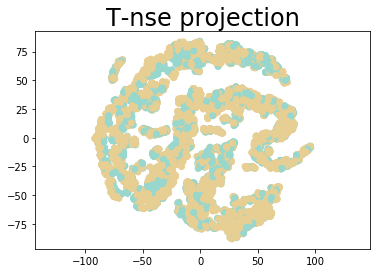

In [108]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=[sns.color_palette("BrBG", 2)[x] for x in X_sample['died']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-nse projection', fontsize=24);

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,10)

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette("BrBG", len(a))[x] for x in labels])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

### convert files to Strings

In [31]:
result=result.merge(no_dups[['QR','RS','ST','labels']], how='left')

In [32]:
result['lab']=result.labels.map(lambda x: chr(98+x))

In [51]:
results_agg=result.groupby('filename').agg({'lab':lambda x: x.sum()}).reset_index()

In [53]:
results_agg.head()

,filename,lab
0,./data/processed.old/107-113-p000107-2121-11-3...,bbcccbbbbbbbbcbbbbbbbbbbbcbbbbbbcbbbbbbcbcbcbc...
1,./data/processed.old/109-129-p000109-2141-10-2...,bbfbbbbbbbbbbbbbbbbcbbbbbbbbbbbbbbbbbbbbbbbbbb...
2,./data/processed.old/109-148-p000109-2142-08-1...,bbbbbbbbbbbbbbbbbbbbcbbbbbbbbbbbbbbbbbbbbbbbbb...
3,./data/processed.old/123-165-p000123-2161-10-2...,bbfbfbbbbbbbbffbbbfbbfbbbbbfbfbbfbbbbbbbbbfbbb...
4,./data/processed.old/124-169-p000124-2166-01-2...,bbbfbbbbfbbfffbbbbbbbfbbbbbfbbfbbbbbbbbbbbbbbb...


In [54]:
from nltk.tokenize import RegexpTokenizer

In [55]:
from nltk.util import ngrams

In [56]:
from collections import Counter

In [57]:
tokenizer = RegexpTokenizer('\S')

In [60]:
phrase_counter = Counter()
for l in results_agg.lab:
    tokens=tokenizer.tokenize(l)
    for phrase in ngrams(tokens, 2):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 3):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 4):
        phrase_counter[phrase] += 1
    for phrase in ngrams(tokens, 5):
        phrase_counter[phrase] += 1    

In [62]:
phrase_counter.most_common(1000)

[(('b', 'b'), 208507),
 (('b', 'b', 'b'), 163038),
 (('b', 'b', 'b', 'b'), 132236),
 (('b', 'b', 'b', 'b', 'b'), 110261),
 (('c', 'b'), 44155),
 (('b', 'c'), 43968),
 (('c', 'c'), 36468),
 (('c', 'b', 'b'), 27598),
 (('b', 'b', 'c'), 27521),
 (('b', 'c', 'b'), 27102),
 (('f', 'b'), 22453),
 (('b', 'f'), 22431),
 (('c', 'c', 'c'), 18257),
 (('b', 'b', 'c', 'b'), 18201),
 (('b', 'c', 'b', 'b'), 18112),
 (('c', 'b', 'b', 'b'), 18104),
 (('b', 'b', 'b', 'c'), 18034),
 (('b', 'c', 'c'), 15498),
 (('c', 'c', 'b'), 15457),
 (('f', 'b', 'b'), 15418),
 (('b', 'b', 'f'), 15403),
 (('b', 'f', 'b'), 15332),
 (('c', 'b', 'c'), 14945),
 (('f', 'f'), 14159),
 (('b', 'b', 'c', 'b', 'b'), 12864),
 (('c', 'b', 'b', 'b', 'b'), 12684),
 (('b', 'b', 'b', 'b', 'c'), 12628),
 (('b', 'b', 'b', 'c', 'b'), 12544),
 (('b', 'c', 'b', 'b', 'b'), 12498),
 (('b', 'b', 'f', 'b'), 11377),
 (('b', 'f', 'b', 'b'), 11368),
 (('b', 'b', 'b', 'f'), 11243),
 (('f', 'b', 'b', 'b'), 11238),
 (('c', 'c', 'c', 'c'), 10007),
 ((

In [65]:
results_agg.shape

(30, 2)